In [29]:
import torch
from train import Trainer
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
def test(model, input_text):
    """
    Test the model by providing a sequence of text and predicting the next character.
    """
    model.model.eval()
    with torch.no_grad():

        input_indices = [model.dataloader.stoi[char] for char in input_text]
        x_test = torch.tensor(input_indices)
        
        # Predict the next character
        output = model.model(x_test) # (1, vocab_size)
        predicted_index = torch.argmax(output[-1,:]).item()  # Index of predicted character
        
        # Decode index to character
        predicted_letter = [k for k, v_ in model.dataloader.stoi.items() if v_ == predicted_index]

    
    return predicted_letter

Modèle sauvegardé à l'emplacement : model.pth


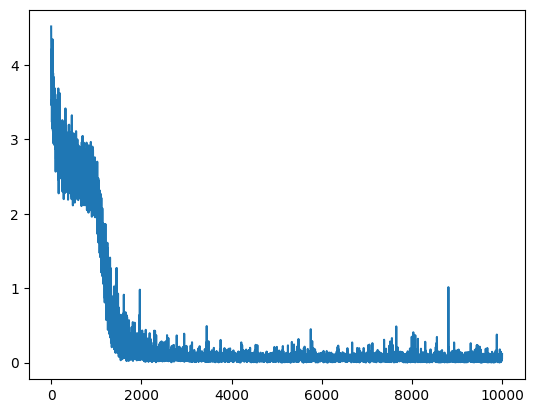

In [30]:
train = Trainer("shakespeare-data.txt")
train.run()
train.save_model()

plt.plot(train.running_loss)
# plt.show()

In [34]:
train = Trainer("shakespeare-data.txt")
train.load_model()

phrase = "You are all resolved"
phrase_final = "You are all resolved"

for _ in range(60) : 

    lettre = test(train, phrase)
    phrase_final  = phrase_final + phrase[0]
    phrase = phrase[1:] + lettre[0]
    


print(phrase_final)

Modèle chargé depuis l'emplacement : model.pth
You are all resolvedYou are all resolved
